In [181]:
import json
from tqdm import tqdm
from datetime import datetime
from datetime import datetime, timedelta
import time
from collections import Counter

In [2]:
telegram_export_file_path = './result.json'
telegram_data = json.load(open(telegram_export_file_path))

In [3]:
chats_list = telegram_data['chats']['list'] + telegram_data['left_chats']['list']

In [4]:
len(chats_list)

858

# Who have I talked to the most?

In [84]:
spring_start_date = datetime(2023, 3, 21)  # Example lower bound date
spring_end_date = datetime(2023, 6, 21)  # Example upper bound date

## The total number of received and sent messages

In [322]:
chat_char_freq = {}
for chat in tqdm(chats_list):
    try:
        if chat['name'] not in chat_char_freq:
            chat_name = chat['name']
        else:
            chat_name = chat['id']
    except:
        chat_name = "خودم"
    chat_char_freq[chat_name] = 0
    for message in chat['messages']:
        if spring_start_date <= datetime.fromisoformat(message['date']) <= spring_end_date:
            chat_char_freq[chat_name] += len(message['text'])

100%|██████████| 858/858 [00:00<00:00, 8362.57it/s]


In [324]:
from collections import Counter

counter_obj = Counter(chat_char_freq)

most_common = counter_obj.most_common()

for person in most_common[:1]:    
    print("name:",person[0], " \tchars: ", person[1])


name: M  	chars:  143266


In [107]:
message

{'id': 1249,
 'type': 'message',
 'date': '2019-02-10T13:21:13',
 'date_unixtime': '1549792273',
 'from': 'Mahdi',
 'from_id': 'user679218067',
 'reply_to_message_id': 1248,
 'text': 'اساس یا اثاث؟',
 'text_entities': [{'type': 'plain', 'text': 'اساس یا اثاث؟'}]}

## The total number of sent messages

In [327]:
my_id = 'user##'
chat_char_freq = {}
for chat in tqdm(chats_list):
    try:
        if chat['name'] not in chat_char_freq:
            chat_name = chat['name']
        else:
            chat_name = chat['id']
    except:
        chat_name = "خودم"
    chat_char_freq[chat_name] = 0
    for message in chat['messages']:
        if message.get('from_id', None) == my_id:
            if spring_start_date <= datetime.fromisoformat(message['date']) <= spring_end_date:
                chat_char_freq[chat_name] += len(message['text'])

100%|██████████| 858/858 [00:00<00:00, 9588.69it/s]


In [326]:
from collections import Counter

counter_obj = Counter(chat_char_freq)

most_common = counter_obj.most_common()

for person in most_common[:1]:    
    print("name:",person[0], " \tchars: ", person[1])


name: M  	chars:  72163


# Message Per Day

In [125]:
my_id = 'user####'
chat_day_freq = {}

current_date = spring_start_date

while current_date <= spring_end_date:
    chat_day_freq[current_date.date()] = 0
    current_date += timedelta(days=1)

for chat in tqdm(chats_list):
    try:
        if chat['name'] not in chat_char_freq:
            chat_name = chat['name']
        else:
            chat_name = chat['id']
    except:
        chat_name = "خودم"
    chat_char_freq[chat_name] = 0
    for message in chat['messages']:
        if message.get('from_id', None) == my_id:
            chat_date = datetime.fromisoformat(message['date'])
            if spring_start_date <= chat_date <= spring_end_date+timedelta(days=1):
                chat_day_freq[chat_date.date()] += len(message['text'])

100%|██████████| 858/858 [00:00<00:00, 4648.98it/s]


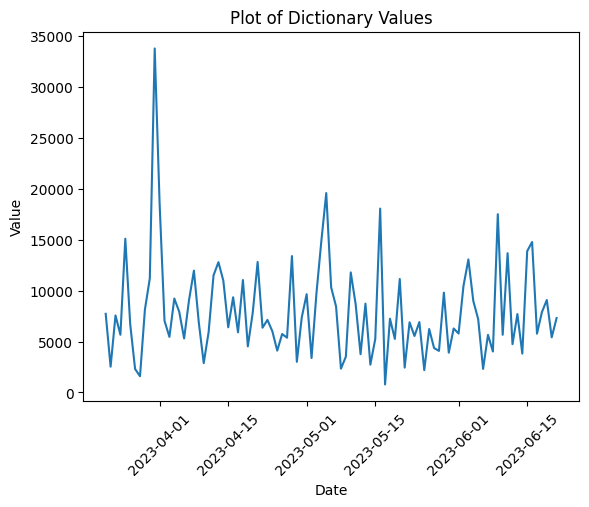

In [127]:
import matplotlib.pyplot as plt
from datetime import date

# Extract the dates and values from the dictionary
dates = list(chat_day_freq.keys())
values = list(chat_day_freq.values())

# Plot the values
plt.plot(dates, values)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Plot of Dictionary Values")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


## Friday, Sunday, or ?

In [143]:
week_days = {i:[] for i in range(7)}
for date_day in chat_day_freq:
    week_days[date_day.weekday()].append(chat_day_freq[date_day])
for d in week_days:
    week_days[d] = int(sum(week_days[d]) / len(week_days[d]))

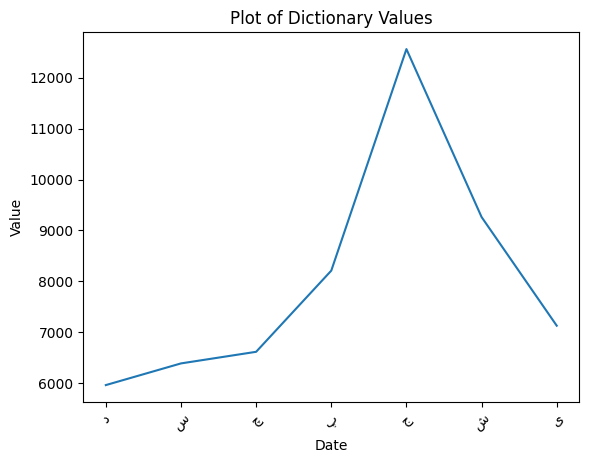

In [147]:
dates = ['د','س','چ','پ','ج','ش','ی']
values = list(week_days.values())

# Plot the values
plt.plot(dates, values)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Plot of Dictionary Values")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Word Analysis

In [211]:
word_counter = Counter()
for chat in tqdm(chats_list):
    chat_char_freq[chat_name] = 0
    for message in chat['messages']:
        if spring_start_date <= datetime.fromisoformat(message['date']) <= spring_end_date:
            if type(message['text']) == str:
                words = message['text'].split()
                word_counter.update(words)
            elif type(message['text']) == list:
                for x in message['text']:
                    if type(x) == dict:
                        words = x['text'].split()
                        word_counter.update(words)
                    elif type(x) == str:
                        words = x.split()
                        word_counter.update(words)

100%|██████████| 858/858 [00:00<00:00, 3547.39it/s]


In [215]:
word_counter.most_common(50)

[('و', 9060),
 ('که', 7842),
 ('به', 7074),
 ('از', 5396),
 ('این', 5215),
 ('من', 5053),
 ('رو', 5038),
 ('در', 4012),
 ('هم', 3819),
 ('با', 2883),
 ('تو', 2230),
 ('یک', 2101),
 ('را', 1777),
 ('شما', 1713),
 ('تا', 1710),
 ('چه', 1701),
 ('دکتر', 1650),
 ('برای', 1618),
 ('نه', 1590),
 ('دیگه', 1468),
 ('ولی', 1435),
 ('یا', 1334),
 ('هر', 1292),
 ('ما', 1280),
 ('بود', 1242),
 ('اون', 1165),
 ('اگر', 1105),
 ('یه', 1088),
 ('باید', 1080),
 ('بعد', 1073),
 ('سلام', 1072),
 ('است', 1007),
 ('الان', 947),
 ('کنم', 910),
 ('آن', 873),
 ('کار', 864),
 ('خیلی', 858),
 ('نیست', 849),
 ('فکر', 841),
 ('خب', 799),
 ('همه', 780),
 ('میشه', 727),
 ('باشه', 719),
 (':)', 718),
 ('همین', 704),
 ('چی', 678),
 ('چرا', 671),
 ('دارم', 663),
 ('دو', 641),
 ('ای', 634)]

In [268]:
persian_stop_words = [
    'از',
    'به',
    'با',
    'و',
    'در',
    'را',
    'برای',
    'تا',
    'که',
    'است',
    'هم',
    'یا',
    'یک',
    'اما',
    'باید',
    'من',
    'شما',
    'آن',
    'این',
    'آنها',
    'خود',
    'هر',
    'همه',
    'هیچ',
    'چندین',
    'چند',
    'چه',
    'بعضی',
    'بعضی‌ها',
    'بیشتر',
    'بیش',
    'کمتر',
    'کم',
    'زیاد',
    'زیادی',
    'دیگر',
    'همچنین',
    'همچون',
    'بلکه',
    'مثل',
    'نیز',
    'ولی',
    'بعد',
    'قبل',
    'بیرون',
    'جلوی',
    'پشت',
    'روی',
    'زیر',
    'بالا',
    'داخل',
    'سمت',
    'نزدیک',
    'دور',
    'بر',
    'بی',
    'ای',
    'تو',
    'اینکه',
    'برای',
    'باشد',
    'شود',
    'شده',
    'خواهد',
    'می',
    'می‌شود',
    'می‌کند',
    'می‌شوند',
    'ما',
    'شما',
    'او',
    'آنها',
    'خود',
    'همه',
    'همین',
    'همچنین',
    'یکی',
    'هیچ',
    'چه',
    'چیزی',
    'کسی',
    'کس',
    'هیچ',
    'کدام',
    'کدامیک',
    'این',
    'آن',
    'تمام',
    'بعضی',
    'کل',
    'چند',
    'بعضی‌ها',
    'دیگری',
    'خیلی',
    'زیاد',
    'کمتر',
    'بیشتر',
    'بهتر',
    'بدتر',
    'همیشه',
    'اکنون',
    'گاهی',
    'گاه',
    'معمولا',
    'مثلا',
    'تازه',
    'ناگهان',
    'شاید',
    'چرا',
    'چطور',
    'کی',
    'آیا',
    'بله',
    'خیر',
    'هرگز',
    'البته',
    'بله',
    'خیر'
]
good_words = {}

## Word Cloud of Sent and Received 

In [279]:
for word, freq in word_counter.most_common(1000):
    if word in persian_stop_words or word in good_words:
        continue
    is_stop = input(f"is {word} good word? {len(good_words)}")
    if is_stop in list('asdfghjklqwertyuiopzxcvbnm'):
        good_words[word] = word_counter.get(word)
    else:
        persian_stop_words.append(word)
    if len(good_words) == 120:
        break

In [280]:
good_words

{'دکتر': 1650,
 'سلام': 1072,
 'کار': 864,
 'فکر': 841,
 ':)': 718,
 'واقعا': 519,
 'وقت': 509,
 'اصلا': 503,
 'روز': 482,
 'خوب': 470,
 'سال': 446,
 'سر': 429,
 'دوست': 401,
 'دست': 380,
 'بنده': 378,
 'صحبت': 378,
 'دانشگاه': 357,
 'زندگی': 350,
 'بابا': 348,
 'امروز': 337,
 'جلسه': 334,
 'سمیعی': 331,
 'باز': 325,
 'نظر': 320,
 'حسنی': 318,
 'آدم': 316,
 'زن': 316,
 'ساعت': 313,
 'هوش': 307,
 'فردا': 307,
 'بحث': 306,
 'ازدواج': 302,
 'خدا': 302,
 'صورت': 273,
 'پیدا': 271,
 'نظرم': 271,
 'سوال': 263,
 'پیام': 256,
 'خانواده': 252,
 'حرف': 250,
 'شب': 250,
 'مورد': 245,
 'مدل': 242,
 'مصیب': 237,
 'داده': 236,
 'قرار': 234,
 'هفته': 233,
 'حس': 233,
 'گروه': 209,
 'وجود': 207,
 'نفر': 200,
 'تمرین': 195,
 'راه': 190,
 'بچه': 190,
 'اشتباه': 188,
 'مهدی': 188,
 'درد': 187,
 'درس': 185,
 'کانال': 182,
 'ماه': 177,
 'ملت': 176,
 'صورتی': 175,
 'دل': 175,
 'عشق': 174,
 'تمدید': 173,
 'مشکل': 171,
 'جواب': 170,
 'حاجی': 165,
 'استفاده': 165,
 'حالت': 164,
 'ترم': 158,
 'ارائه': 155,
 'دو

In [281]:
my_counter = Counter(good_words)

In [317]:
from wordcloud_fa import WordCloudFa
wordcloud = WordCloudFa(persian_normalize=True, no_reshape=True, width=1600, colormap='hsv', height=1200, max_words=1000)
wc = wordcloud.generate_from_frequencies(my_counter)
image = wc.to_image()
image.show()
image.save('wordcloud_no_stopwords_spring_1402.png')

Error: no "view" mailcap rules found for type "image/png"


Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "/tmp/tmp5jo1f1if.PNG"
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


## Word Cloud of Sent 

In [286]:
word_counter = Counter()
for chat in tqdm(chats_list):
    chat_char_freq[chat_name] = 0
    for message in chat['messages']:
        if message.get('from_id', None) == my_id:
            if spring_start_date <= datetime.fromisoformat(message['date']) <= spring_end_date:
                if type(message['text']) == str:
                    words = message['text'].split()
                    word_counter.update(words)
                elif type(message['text']) == list:
                    for x in message['text']:
                        if type(x) == dict:
                            words = x['text'].split()
                            word_counter.update(words)
                        elif type(x) == str:
                            words = x.split()
                            word_counter.update(words)

100%|██████████| 858/858 [00:00<00:00, 4679.08it/s]


In [285]:
good_words_sent = {}

In [291]:
for word, freq in word_counter.most_common(1000):
    if word in persian_stop_words:
        continue
    if word in good_words:
        good_words_sent[word] = word_counter.get(word)
        continue
    is_stop = input(f"is {word} good word? {len(good_words_sent)}")
    if is_stop in list('asdfghjklqwertyuiopzxcvbnm'):
        good_words_sent[word] = word_counter.get(word)
    else:
        persian_stop_words.append(word)
    if len(good_words_sent) == 120:
        break

In [293]:
len(good_words_sent)

120

In [294]:
my_sent_counter = Counter(good_words_sent)

In [318]:
from wordcloud_fa import WordCloudFa
wordcloud = WordCloudFa(persian_normalize=True, no_reshape=True, width=1600, height=1200, colormap='spring', background_color='#141414')
wc = wordcloud.generate_from_frequencies(my_sent_counter)
image = wc.to_image()
image.show()
image.save('mysent_wordcloud_no_stopwords_spring_1402.png')

Error: no "view" mailcap rules found for type "image/png"


Start : This command cannot be run due to the error: The system cannot find the file specified.
At line:1 char:1
+ Start "/tmp/tmplw6bd8bo.PNG"
+ ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    + CategoryInfo          : InvalidOperation: (:) [Start-Process], InvalidOperationException
    + FullyQualifiedErrorId : InvalidOperationException,Microsoft.PowerShell.Commands.StartProcessCommand
 


In [296]:
persian_stop_words

['از',
 'به',
 'با',
 'و',
 'در',
 'را',
 'برای',
 'تا',
 'که',
 'است',
 'هم',
 'یا',
 'یک',
 'اما',
 'باید',
 'من',
 'شما',
 'آن',
 'این',
 'آنها',
 'خود',
 'هر',
 'همه',
 'هیچ',
 'چندین',
 'چند',
 'چه',
 'بعضی',
 'بعضی\u200cها',
 'بیشتر',
 'بیش',
 'کمتر',
 'کم',
 'زیاد',
 'زیادی',
 'دیگر',
 'همچنین',
 'همچون',
 'بلکه',
 'مثل',
 'نیز',
 'ولی',
 'بعد',
 'قبل',
 'بیرون',
 'جلوی',
 'پشت',
 'روی',
 'زیر',
 'بالا',
 'داخل',
 'سمت',
 'نزدیک',
 'دور',
 'بر',
 'بی',
 'ای',
 'تو',
 'اینکه',
 'برای',
 'باشد',
 'شود',
 'شده',
 'خواهد',
 'می',
 'می\u200cشود',
 'می\u200cکند',
 'می\u200cشوند',
 'ما',
 'شما',
 'او',
 'آنها',
 'خود',
 'همه',
 'همین',
 'همچنین',
 'یکی',
 'هیچ',
 'چه',
 'چیزی',
 'کسی',
 'کس',
 'هیچ',
 'کدام',
 'کدامیک',
 'این',
 'آن',
 'تمام',
 'بعضی',
 'کل',
 'چند',
 'بعضی\u200cها',
 'دیگری',
 'خیلی',
 'زیاد',
 'کمتر',
 'بیشتر',
 'بهتر',
 'بدتر',
 'همیشه',
 'اکنون',
 'گاهی',
 'گاه',
 'معمولا',
 'مثلا',
 'تازه',
 'ناگهان',
 'شاید',
 'چرا',
 'چطور',
 'کی',
 'آیا',
 'بله',
 'خیر',
 'هرگز